In [1]:
!pip install fastai2 > ../dev/null
!pip install utils > ../dev/null  

In [1]:
import pandas as pd
import numpy as np
import torch
import math
from functools import partial
import matplotlib.pyplot as plt

In [2]:
from utils import *
from fastai2.vision.widgets import *
from fastai2.vision.all import *

# Lesson 3 (suite): Gradient Descent

## how can we perform linear regression using gradient descent ?


Here is the pseudo code:

* get the data
* initialize weights
* train: for each epoch:
* * make predictions
* * compute the loss
* * backpropagate the loss
* * update the gradients

### Get the data
Create data that follow the function y=3x+2

In [3]:
# np.random.rand() gives you a random number between 0 and 1
np.random.rand()

0.9866848849105029

In [4]:
# What if you want to have two numbers ?
np.random.rand(2)

array([0.79656442, 0.9717597 ])

In [5]:
# use np.random.rand() to get 300 points distributed between 0 and 100
x = np.random.rand(300)

assert x.shape == (300,)
assert x.mean() >= 0.4  # this should pass most of the time, if not, relaunch the cell
assert x.mean() <= 0.6  # this should pass most of the time, if not, relaunch the cell

In [6]:
# create your "y" value using the equation y=3x+2
y =  3 * x + 2

assert (y == (3*x+2)).all()

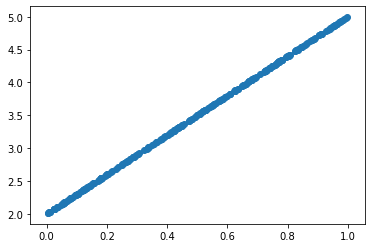

In [7]:
plt.scatter(x, y)

## can you code the gradient descent ? 
Create data that follow the function y=3x+2. Then figure a way to find back these parameters using gradient descent.

## Help: math equations for gradient calculation

\begin{array}{c}
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-(a x_{i} + b ) \right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-a x_{i} - b\right)^{2}}
\end{array}




\begin{aligned}
\frac{\partial M S E}{\partial a} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial a}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot(-1)=-2 \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)* \\
\frac{\partial M S E}{\partial b} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial b}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot\left(-x_{i}\right)=-2 \frac{1}{N} \sum_{i=1}^{N} x_{i}\left(y_{i}-\hat{y}_{i}\right) **
\end{aligned}
*the mean of errors

\**the mean of (errors * xi)

In [8]:
# initialize parameters (at first, we believe a=1 and b=1)
a = 1.
b = 1.

In [9]:
# train:
epochs = 3000
learning_rate = 0.001

for epoch in range(2000):
    # make predictions
    y_hat = a * x + b # you predict ax+b, at first it's 1x+1, but those parameters will change ;)

    # compute the loss
    errors = (y - y_hat)  # what you predicted (y_hat), minus the truth (y)
    loss = (errors ** 2).mean()  # take the errors, square them, and take the mean.

    # print the loss to ensure training is going well:
    if epoch % 100 == 0:
        print(loss)

    # backpropagate the loss (in two parts)
    
    # 1: calculate the gradients (I did that for you,
    # your exercise is to compare that with the math formulaes above and see how they compare :)
    a_grad = -2 * errors.mean()  
    b_grad = -2 * (x * errors).mean()

    # 2: update parameters
    a -= a_grad * learning_rate  # Try with and without the learning rate ;)
    b = b - b_grad * learning_rate

4.2200263786437
2.771280539507429
1.8200703465262704
1.1955354570610848
0.7854914315294111
0.5162795894434428
0.3395367131710158
0.22350822471685935
0.1473445418907157
0.09735614738418633
0.06455472072280315
0.04303868070429355
0.028933155682644054
0.019693983244855363
0.013650726379894881
0.009706624457873443
0.007141585361325724
0.0054828329637140235
0.004419976141927172
0.0037492443334191674


In [10]:
print(a, b)

2.8104836795154826 2.0755203670029796


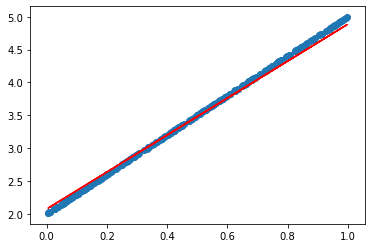

In [11]:
y_pred = a * x + b  # you could also call y_pred "model"
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

# Why pytorch ?

Pytorch looks a lot like numpy. And it has a lot of advantages. Let's see:

## Linear regression with pytorch

In [ ]:
import torch
import matplotlib.pyplot as plt

Create your x and y, following the same constraints:

- x has 300 randomly distributed numbers between 0 and 1
- y = 3x+2

<b>HINT</b> type torch. and wait (or press tab if you are not in colab but in actual jupyter notebook) and search for something that looks like np.random.rand()

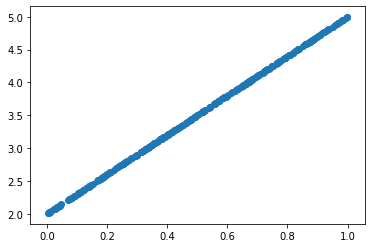

In [19]:
# see how close torch is to numpy ?
x = torch.rand(300) 
y = 3 * x + 2 
plt.scatter(x, y)

Here, create your parameters a and b. They should be tensors, of course, 
but if you remember the lesson, you should also tell pytorch that you want them to store the gradients !

In [20]:
# Here, use torch.nn.Parameter() 
a = torch.tensor(1.).requires_grad_()
b = torch.tensor(1.).requires_grad_()

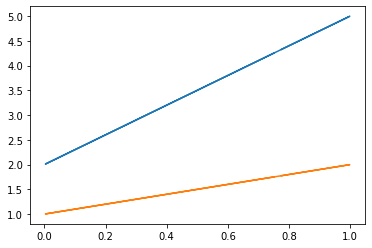

In [22]:
y_pred = (a * x + b).detach().numpy()
plt.plot(x, y)
plt.plot(x, y_pred)

In [24]:
epochs = 10000
lr = 0.001
a = torch.tensor(1.).requires_grad_()
b = torch.tensor(1.).requires_grad_()

for i in range(epochs):
    # calculate the preds
    y_pred = a * x + b

    # calculate the loss
    mse = ((y - y_pred) ** 2).mean()
    if i % 1000 == 0:
        print(mse)

    # backward pass:
    mse.backward()

    # gradient descent:
    with torch.no_grad():
        a -= a.grad * 0.001
        b -= b.grad * 0.001
        a.grad.zero_()  # 
        b.grad.zero_()

tensor(4.2681, grad_fn=<MeanBackward0>)
tensor(0.1093, grad_fn=<MeanBackward0>)
tensor(0.0645, grad_fn=<MeanBackward0>)
tensor(0.0501, grad_fn=<MeanBackward0>)
tensor(0.0390, grad_fn=<MeanBackward0>)
tensor(0.0304, grad_fn=<MeanBackward0>)
tensor(0.0237, grad_fn=<MeanBackward0>)
tensor(0.0185, grad_fn=<MeanBackward0>)
tensor(0.0144, grad_fn=<MeanBackward0>)
tensor(0.0112, grad_fn=<MeanBackward0>)


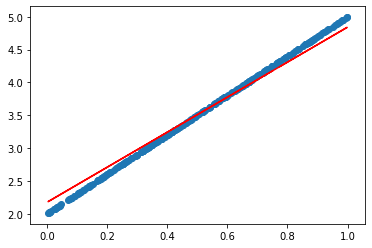

In [25]:
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

In [223]:
print(a, b)

Parameter containing:
tensor(2.7083, requires_grad=True) Parameter containing:
tensor(2.1669, requires_grad=True)


# Replace MSE with MAE
What do you find out ? 

In [224]:
# Replace MSE (mean squared error) by MAE (mean average error)
epochs = 10000
a = torch.nn.Parameter(torch.tensor(1.))
b = torch.nn.Parameter(torch.tensor(1.))

for i in range(epochs):
    # calculate the preds
    y_pred = a * x + b

    # calculate the loss
    mae = (abs(y - y_pred)).mean()
    if i % 1000 == 0:
        print(mae)

    # backward pass:
    mae.backward()

    # gradient descent:
    with torch.no_grad():
        a -= a.grad * 0.001
        b -= b.grad * 0.001
        a.grad.zero_()
        b.grad.zero_()

tensor(2.0696, grad_fn=<MeanBackward0>)
tensor(0.7836, grad_fn=<MeanBackward0>)
tensor(0.2632, grad_fn=<MeanBackward0>)
tensor(0.1999, grad_fn=<MeanBackward0>)
tensor(0.1523, grad_fn=<MeanBackward0>)
tensor(0.1049, grad_fn=<MeanBackward0>)
tensor(0.0574, grad_fn=<MeanBackward0>)
tensor(0.0099, grad_fn=<MeanBackward0>)
tensor(0.0009, grad_fn=<MeanBackward0>)
tensor(0.0009, grad_fn=<MeanBackward0>)


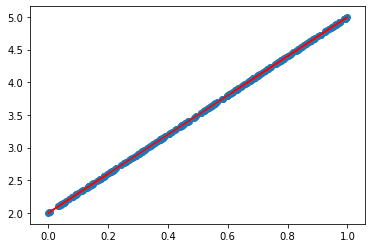

In [225]:
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

In [226]:
# It takes more time to train, but seems to give a better result
a, b

(Parameter containing:
 tensor(2.9990, requires_grad=True), Parameter containing:
 tensor(1.9996, requires_grad=True))

### Learn more
The lesson from last year on SGD is also worth taking a look at. You can find it <a href="https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb"> here </a>

In [148]:
# An interesting thing they do differently
# is they store a and b in a single vector
# And then perform matrix-vector multiplication

In [213]:
x = torch.ones(200, 2)
a = torch.nn.Parameter(torch.tensor([1., 1.]))

In [214]:
a @ x

RuntimeError: size mismatch, m1: [1 x 2], m2: [200 x 2] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:136

In [215]:
x @ a

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.], grad_fn=<MvBackward>)

To get a visual understanding of matrix-vector (or matrix-matrix) multiplications, <a href="http://matrixmultiplication.xyz/"> visit this link </a>

You can find a pytorch tutorial that dives deeply into the autograd and computation graph here <a href="https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e"> here </a>